<h1>Tache 2 : Application de XGBoost</h1>
<p>L'analyse et la prévision du marcher boursier Tunisisen est une tache qui n'est pas exploréedans le domaine académéque et financier vu la nature du marchée en Tunisie(asymétrie de l'information, fraude, inclarité des bilans, difficultée de l'aquisition de Data..)<br>Dans ce kernel un essai modéste de l'application de l'algorithme de regression//XGBoost sera effectuée Pour tout information, FeedBack vous pouvez visitez https://github.com/azseza/APMBT_DataMining , ou m'envoyer un mail directement azeer.ltifi@gmail.com</p>

In [1]:
#importation de Bib utiles
import pandas as pd
import numpy as np 


In [2]:
data = pd.read_csv('Data.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,IPI,MTT,Import,Export,BalCom,Pib1,Pib2,ref,...,cloture.41,ref.42,ouverture.42,cloture.42,Price,Open,High,Low,Vol.,Change %
0,1,2018-01-02,92.8,5.53,3129.5,4339.0,-1221.8,1694.2,18158.6,16500,...,420,19400,19310,19880,6203.27,6287.26,6287.26,6175.95,368260,-1.25
1,2,2018-01-03,92.8,5.53,3129.5,4339.0,-1221.8,1694.2,18158.6,16500,...,420,19400,19310,19880,6257.17,6191.54,6257.24,6190.56,516340,0.87
2,3,2018-01-04,92.8,5.53,3129.5,4339.0,-1221.8,1694.2,18158.6,16500,...,430,19880,19880,19780,6248.93,6258.01,6280.60,6228.69,547880,-0.13
3,4,2018-01-05,92.8,5.53,3129.5,4339.0,-1221.8,1694.2,18158.6,16980,...,420,19780,19620,19780,6265.03,6240.59,6265.83,6226.92,710570,0.26
4,7,2018-01-08,92.8,5.53,3129.5,4339.0,-1221.8,1694.2,18158.6,16900,...,410,19780,19780,19900,6309.85,6265.08,6325.98,6264.27,632100,0.72


<p>Ce DataSet Comporte la majorité des valeurs du groupe 11 du marchée tuninsien boursier; on aura recours a isoler les valuers du Tunindex, aisni que de l'sfbt et DHG(Delice Holding), on n'utilisera que les valeurs de ouverture<br></p>
<h3>Data Extraction and feature engineering</h3>

In [3]:
tunIndex= data[["Open"]].copy()
sfbt = data[["ouverture.42"]].copy()
dhl = data[["ouverture"]].copy()

In [4]:
tunIndex.head(10)

,Open
0,6287.26
1,6191.54
2,6258.01
3,6240.59
4,6265.08
5,6313.80
6,6263.51
7,6233.30
8,6263.58
9,6294.82


In [5]:
sfbt.head(5)

,ouverture.42
0,19310
1,19310
2,19880
3,19620
4,19780


In [6]:
dhl.head(7)

,ouverture
0,16690
1,16690
2,16980
3,16900
4,16900
5,16900
6,16900


<h3>Transformation du dataset en un probléme d'apprentissage supervisée</h3>

In [7]:
tunIndex["target"] = tunIndex["Open"].shift(-1)
sfbt["target"] = sfbt["ouverture.42"].shift(-1)
dhl["target"] = dhl["ouverture"].shift(-1)

In [8]:
tunIndex

,Open,target
0,6287.26,6191.54
1,6191.54,6258.01
2,6258.01,6240.59
3,6240.59,6265.08
4,6265.08,6313.80
...,...,...
728,6830.68,6857.74
729,6857.74,6874.89
730,6874.89,6895.04
731,6895.04,6888.83


In [9]:
#Suppression des NaN
tunIndex = tunIndex.dropna()
sfbt = sfbt.dropna()
dhl = dhl.dropna()

<h3>Train/Test Set Split</h3>

In [10]:
def train_test_split(data, pourcent):
    data = data.values
    n = int(len(data) * (1 - pourcent))
    print(data[n])
    return data[:n], data[n:]

In [11]:
trainTI, testTI = train_test_split(tunIndex, 0.2)
trainSFBT, testSFBT = train_test_split(sfbt, 0.2)
trainDHL, testDHL = train_test_split(dhl, 0.2)

[6300.58 6350.87]
[19200. 19200.]
[11000. 11450.]


In [12]:
print("Taille des datas de l'apprentissage de Tunindex   "+str(len(trainTI)))
print("Taille des datas de Test de TunIndex   "+str(len(testTI)))

Taille des datas de l'apprentissage de Tunindex   585
Taille des datas de Test de TunIndex   147


In [13]:
from xgboost import XGBRegressor as xgb 
from sklearn.metrics import mean_squared_error

In [14]:
#
#Xti = trainTI[: , :-1]
#Yti = trainTI[: , -1]
#Xsfbt = trainSFBT[: , :-1]
#Ysfbt = trainSFBT[: , -1]
#Xdhl = trainDHL[: , :-1]
#Ydhl = trainDHL[: , -1]

In [15]:
#
#modelTI = xgb(obective="reg:squarederror", n_esitmators=1000)
#modelsfbt = xgb(obective="reg:squarederror", n_esitmators=1000)
#modeldhl = xgb(obective="reg:squarederror", n_esitmators=1000)
#modelTI.fit(Xti, Yti)
#modelsfbt.fit(Xsfbt, Ysfbt)
#modeldhl.fit(Xdhl, Ydhl)

In [16]:
def xgbt_predict(train, val):
    train = np.array(train)
    X , Y = train[: , :-1], train[: , -1]
    model = xgb(obective="reg:squarederror", n_esitmators=1000)
    model.fit(X, Y)
    
    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred

In [17]:
def validate(data, perc):
    prediction = []
    
    train, test = train_test_split(data, perc)
    historique = [x for x in train]
    
    for i in range(len(test)):
        test_x, test_y = test[i , :-1], test[i , -1]
        print(type(test_x))
        pred = xgbt_predict(historique, test_x[0:])
        prediction.append(pred)
        
        historique.append(test[i])
    
    erreur = mean_squared_error(test[:,-1], prediction, squared=False)
    
    return  erreur ,test[:,-1], prediction
    

In [18]:
errsfbt, valsSfbt, predsfbt = validate(sfbt, 0.2)
errDhl, valsDhl, predDhl = validate(dhl, 0.2)
errTI, valsTI, predTI = validate(tunIndex, 0.2)

[19200. 19200.]
<class 'numpy.ndarray'>
[14:45:21] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:21] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:21] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or s

/home/azseza/.local/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(



<class 'numpy.ndarray'>
[14:45:21] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:21] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:21] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters 

<class 'numpy.ndarray'>
[14:45:24] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:24] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:24] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:25] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:25] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:25] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:27] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:27] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:27] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:28] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:28] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:28] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:31] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:31] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:31] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

/home/azseza/.local/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<class 'numpy.ndarray'>
[14:45:32] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:32] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:33] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:34] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:34] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:34] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:36] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:36] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:36] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:38] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:38] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:38] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:39] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:39] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:39] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:41] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:41] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:41] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

/home/azseza/.local/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<class 'numpy.ndarray'>
[14:45:43] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:43] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:43] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:45] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:45] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:45] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:47] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:47] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:47] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:49] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:49] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:49] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:51] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:51] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:51] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:53] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:53] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


<class 'numpy.ndarray'>
[14:45:53] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

<class 'numpy.ndarray'>
[14:45:55] WARNING: ../src/learner.cc:541: 
Parameters: { n_esitmators, obective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




### traitement de données prédites pour générer un plot

In [24]:
import matplotlib.pyplot as plt

In [19]:
predictionssfbt = []
valeurssfbt = []
for i in predsfbt : 
    predictionssfbt.append(float(i[0]))
for i in valsSfbt : 
    valeurssfbt.append(float(i))

predictionsDhl = []
valeursDhl = []
for i in predDhl : 
    predictionsDhl.append(float(i[0]))
for i in valsDhl : 
    valeursDhl.append(float(i))

predictionsTI = []
valeursTI = []
for i in predTI : 
    predictionsTI.append(float(i[0]))
for i in valsTI : 
    valeursTI.append(float(i))

In [40]:
predictionsTI = pd.DataFrame(predictionsTI , columns=['pred_tunIndex'])
valeursTI = pd.DataFrame(valeursTI, columns=['vals_tunIndex'])

predictionsDhl = pd.DataFrame(predictionsDhl, columns=['pred_Delice'])
valeursDhl = pd.DataFrame(valeursDhl, columns=['vals_Delice'])

predictionssfbt = pd.DataFrame(predictionssfbt , columns=['pred_Sfbt'])
valeurssfbt = pd.DataFrame(valeurssfbt, columns=['vals_Sfbt'])

,vals_tunIndex
0,6350.87
1,6377.98
2,6432.41
3,6487.12
4,6437.35
...,...
142,6830.68
143,6857.74
144,6874.89
145,6895.04


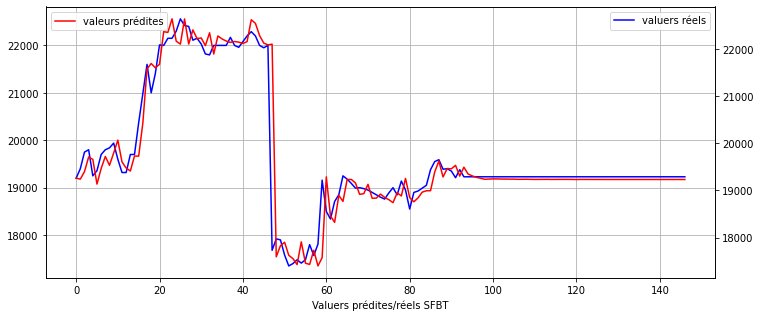

In [41]:
#Graph de comparaison entre valuers prédite et valeurs réels pour l'SFBT
plt.figure(figsize=(12,5))
plt.xlabel('Valuers prédites/réels SFBT')

ax1 = valeurssfbt["vals_Sfbt"].plot(color='blue', grid=True, label='valuers réels')
ax2 = predictionssfbt["pred_Sfbt"].plot(color='red', grid=True, secondary_y=True, label='valeurs prédites')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

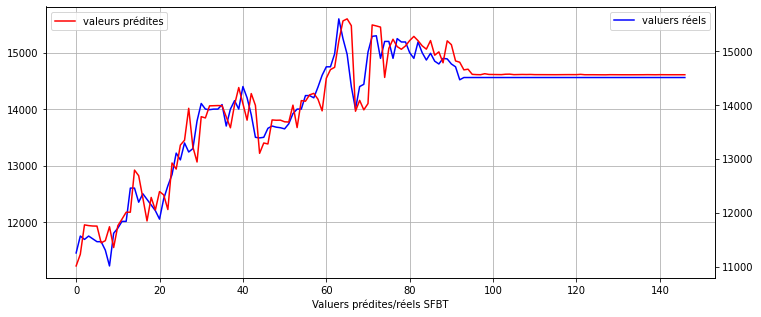

In [42]:
#Graph de comparaison entre valuers prédite et valeurs réels pour Delice 
plt.figure(figsize=(12,5))
plt.xlabel('Valuers prédites/réels Delice Holidng')

ax1 = valeursDhl['vals_Delice'].plot(color='blue', grid=True, label='valuers réels')
ax2 = predictionsDhl['pred_Delice'].plot(color='red', grid=True, secondary_y=True, label='valeurs prédites')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

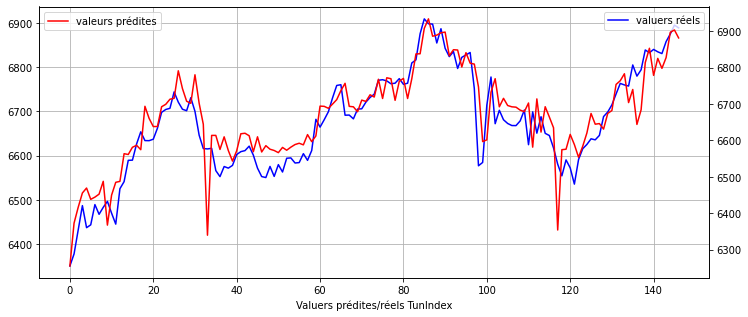

In [43]:
#Graph de comparaison entre valuers prédite et valeurs réels pour TunIndex 
plt.figure(figsize=(12,5))
plt.xlabel('Valuers prédites/réels TunIndex')

ax1 = valeursTI['vals_tunIndex'].plot(color='blue', grid=True, label='valuers réels')
ax2 = predictionsTI['pred_tunIndex'].plot(color='red', grid=True, secondary_y=True, label='valeurs prédites')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()